<a href="https://colab.research.google.com/github/leenu10/DataScienceAnalytics/blob/main/Week11LogisticRegr%26KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.shape

(400, 5)

In [ ]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
data['Purchased'].value_counts(normalize=True)    # percentage of value counts.

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [ ]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# One Hot Encoding of Gender column

In [ ]:
data = pd.get_dummies(data)
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


# Splitting the data into train and test data.

In [ ]:
x = data.drop(['User ID', 'Purchased'], axis=1)
y = data['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [ ]:
x_train.shape

(320, 4)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print('Accuracy is:', accuracy_score(y_test, y_pred))
print('Precision is:', precision_score(y_test, y_pred))
print('Recall is:', recall_score(y_test, y_pred))
print('f1 score is:', f1_score(y_test, y_pred))

Accuracy is: 0.65
Precision is: 0.0
Recall is: 0.0
f1 score is: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


for a good model accuracy and f1 score should be maximum possible.

In [ ]:
confusion_matrix(y_test, y_pred)

array([[52,  0],
       [28,  0]])

so, there are misclassifications we will have to deal with.

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  acc_values.append(acc)

In [ ]:
acc_values

[0.8, 0.8, 0.825, 0.775, 0.8125, 0.775, 0.8, 0.775, 0.8, 0.775, 0.75, 0.7625]

here, 82.5 is the accuracy value we have got. and so we need to find for which k value we got this accuracy.

Text(0, 0.5, 'accuracy')

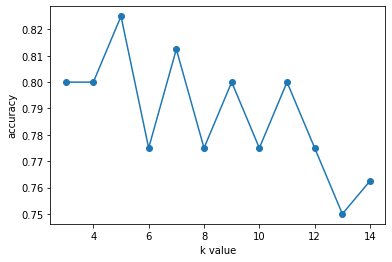

In [ ]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

As we can see the highest accuracy is for k value 5.

Thus we can make a model with k value 5.

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [ ]:
print('Accuracy is:', accuracy_score(y_test, y_pred))
print('Precision is:', precision_score(y_test, y_pred))
print('Recall is:', recall_score(y_test, y_pred))
print('f1 score is:', f1_score(y_test, y_pred))

Accuracy is: 0.825
Precision is: 0.7692307692307693
Recall is: 0.7142857142857143
f1 score is: 0.7407407407407408


In [ ]:
confusion_matrix(y_test, y_pred)

array([[46,  6],
       [ 8, 20]])

the confusion matrix have predicted 14 misclassifications here.

# Checking the model working after Scaling of the features.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
x.describe()

,Age,EstimatedSalary,Gender_Female,Gender_Male
count,400.000000,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.510000,0.490000
std,10.482877,34096.960282,0.500526,0.500526
min,18.000000,15000.000000,0.000000,0.000000
25%,29.750000,43000.000000,0.000000,0.000000
50%,37.000000,70000.000000,1.000000,0.000000
75%,46.000000,88000.000000,1.000000,1.000000
max,60.000000,150000.000000,1.000000,1.000000


## Scaling all the features.

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3
0,-1.066752,-0.386344,1.0,-1.0
1,0.797535,-1.229939,-1.0,1.0
2,0.110692,1.853544,1.0,-1.0
3,0.601294,-0.909955,1.0,-1.0
4,1.876859,-1.288118,1.0,-1.0


In [ ]:
# Logistic Regression

logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test) 

In [ ]:
print('Accuracy is:', accuracy_score(y_test, y_pred))
print('Precision is:', precision_score(y_test, y_pred))
print('Recall is:', recall_score(y_test, y_pred))
print('f1 score is:', f1_score(y_test, y_pred))

Accuracy is: 0.875
Precision is: 0.875
Recall is: 0.75
f1 score is: 0.8076923076923077


accuracy increased after scaling.

In [ ]:
confusion_matrix(y_test, y_pred)

array([[49,  3],
       [ 7, 21]])

there is only 10 misclassifications after scaling the features.

In [ ]:
# KNN

acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  acc_values.append(acc)

Text(0, 0.5, 'accuracy')

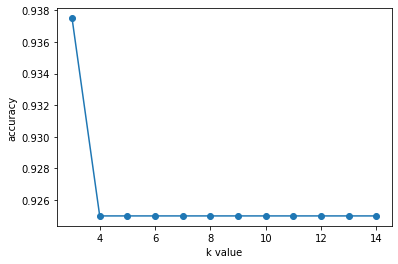

In [ ]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [ ]:
print('Accuracy is:', accuracy_score(y_test, y_pred))
print('Precision is:', precision_score(y_test, y_pred))
print('Recall is:', recall_score(y_test, y_pred))
print('f1 score is:', f1_score(y_test, y_pred))

Accuracy is: 0.9375
Precision is: 0.8709677419354839
Recall is: 0.9642857142857143
f1 score is: 0.9152542372881356


In [ ]:
confusion_matrix(y_test, y_pred)

array([[48,  4],
       [ 1, 27]])

after scaling, accuracy increased and the only 5 misclassifications are there now.

## scaling only the features 'Age' and 'EstimatedSalary'

In [ ]:
x_train.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
3,27,57000,1,0
18,46,28000,0,1
202,39,134000,1,0
250,44,39000,1,0
274,57,26000,1,0


In [ ]:
x_train[['Age','EstimatedSalary']] = sc.fit_transform(x_train[['Age','EstimatedSalary']])
x_train.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
3,-1.066752,-0.386344,1,0
18,0.797535,-1.229939,0,1
202,0.110692,1.853544,1,0
250,0.601294,-0.909955,1,0
274,1.876859,-1.288118,1,0


In [ ]:
x_test.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
209,46,22000,1,0
280,59,88000,1,0
33,28,44000,1,0
210,48,96000,1,0
93,29,28000,1,0


In [ ]:
x_test[['Age','EstimatedSalary']] = sc.fit_transform(x_test[['Age','EstimatedSalary']])
x_test.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
209,0.802857,-1.396497,1,0
280,1.935791,0.625303,1,0
33,-0.765819,-0.722564,1,0
210,0.977155,0.870370,1,0
93,-0.678671,-1.212697,1,0


In [ ]:
# Logistic Regression

logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test) 

In [ ]:
print('Accuracy is:', accuracy_score(y_test, y_pred))
print('Precision is:', precision_score(y_test, y_pred))
print('Recall is:', recall_score(y_test, y_pred))
print('f1 score is:', f1_score(y_test, y_pred))

Accuracy is: 0.875
Precision is: 0.875
Recall is: 0.75
f1 score is: 0.8076923076923077


In [ ]:
confusion_matrix(y_test, y_pred)

array([[49,  3],
       [ 7, 21]])

Here, the results are the same as that of scaling all the features.